In [1]:
!python functions.py
## note after making changes,kernel must be restarted for changes to apply 

In [2]:
import functions
import datasets
from sklearn.model_selection import train_test_split



C:\Users\theot\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [3]:
DS = datasets.Datasets()
tweets = DS.tweets_df
retweets = DS.retweets_df
twitter = tweets.append(retweets)
data_name = "twitter"## to be changed
    
data = twitter 

    

dfH = data.loc[data['BCandidate']==0,:]
dfT =data.loc[data['BCandidate']==1,:]
dfH
    

,File Name,BCandidate,Content_Category,Num Prop,Loaded_Language,"Name_Calling,Labeling",Repetition,"Exaggeration,Minimisation",Doubt,Appeal_to_fear-prejudice,Flag-Waving,Causal_Oversimplification,Slogans,Appeal_to_Authority,Black-and-White_Fallacy,Thought-terminating_Cliches,"Whataboutism,Straw_Men,Red_Herring","Obfuscation,Intentional_Vagueness,Confusion","Bandwagon,Reductio_ad_hitlerum"
1983,HC0_500.txt,0,tweet,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,HC0_500.txt,0,tweet,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,HC0_500.txt,0,tweet,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,HC0_500.txt,0,tweet,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,HC0_500.txt,0,tweet,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,HC500_1000.txt,0,tweet,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3501,HC500_1000.txt,0,tweet,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3502,HC500_1000.txt,0,tweet,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3503,HC500_1000.txt,0,tweet,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


HC length:  1522
DT length:  3038
missing_rows: 1516 row_fraction: 0.9960578186596584
DT length ratio:  0.5
extra trees_GS_twitter results on test data
roc_auc: 0.6230742140409335
accurarcy: 0.6258223684210527
note 1 is Donald Trump


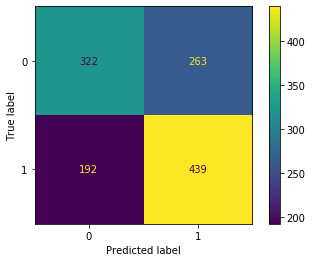

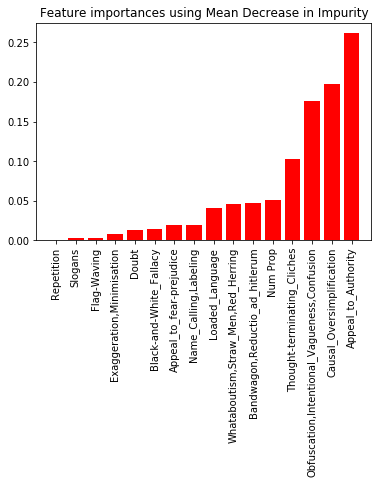

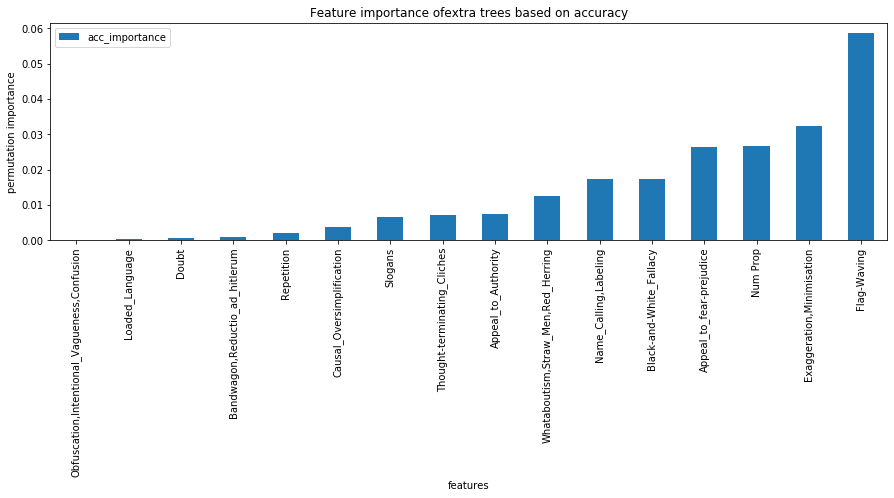

extra trees: Done!


In [ ]:
def twitter_loop():
    DS = datasets.Datasets()
    tweets = DS.tweets_df
    retweets = DS.retweets_df
    twitter = tweets.append(retweets)
    data_name = "twitter"## to be changed
    
    data = twitter 
    data = functions.balance_data(data)
    
    X = data.loc[:,"Num Prop":"Bandwagon,Reductio_ad_hitlerum",]
    Y = data.loc[:,"BCandidate"]

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)
   
    RF_ET_name = ['extra trees', 'random forest']
    for name in RF_ET_name:
        model, param_grid = functions.choose_model(name)
        trained_model = functions.model_training(model,X_train, Y_train, param_grid)
        filename = functions.save_model(trained_model,name,data_name)
        loaded_model = functions.scorer(filename, X_test, Y_test)
        functions.graph_MDI_importance(X_train,Y_train,loaded_model,name, data_name)
        functions.show_permutation_feature_importance(loaded_model, X_train, Y_train, name, data_name)
        print(name + ': Done!')

    
    SVM_LO_NN = ["support vector machine",'neural net']#'lasso', ## this cannot be used because it cannon predict by classification
    for name in SVM_LO_NN :
        model, param_grid = functions.choose_model(name)
        trained_model = functions.model_training(model,X_train, Y_train, param_grid)
        filename = functions.save_model(trained_model,name,data_name)
        loaded_model = functions.scorer(filename, X_test, Y_test)
        print(name + ': Done!')
    
    #functions.barchart(data, data_name)
    #functions.boxplotting(data)
    
        
twitter_loop()

In [ ]:
#functions.barchart(data, data_name)

In [ ]:
#boxplotting(data)